# Strategy 

In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np
import tarfile
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from clustering import *
from tqdm import tqdm

In [2]:
# autoreload    
%load_ext autoreload
%autoreload 2

In [4]:
from clustering import *
tar_file_path = 'data/cleaned_data.tar'

period_data = load_cleaned_data(tar_file_path)

In [5]:
after_15_30 = period_data.copy()
after_15_30 = after_15_30.pivot_table(index='xltime', columns='stock', values='price', aggfunc='mean')
after_15_30.index = pd.to_datetime(after_15_30.index)
after_15_30 = after_15_30[after_15_30.index.time >= datetime.strptime('15:30', '%H:%M').time()]

after_15_30

stock,CORN,CPER,DBC,EIS,EUSA,EWA,EWC,EWD,EWG,EWH,...,USO,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
xltime,,,,,,,,,,,,,,,,,,,,,
2012-03-01 15:30:00,41.033056,27.770960,29.832446,40.948824,29.656403,23.915227,29.306671,29.565486,23.218382,18.286976,...,41.934760,37.362520,75.544803,14.894215,37.315204,29.090772,33.124608,34.901217,36.343785,43.480585
2012-03-01 15:31:00,41.017398,27.733922,29.842285,40.956000,29.641789,23.914424,29.302070,29.566527,23.213049,18.281656,...,41.975878,37.353526,75.537508,14.892514,37.302899,29.080492,33.125699,34.903048,36.334793,43.474528
2012-03-01 15:32:00,41.015000,NaN,29.837190,40.953614,29.630391,23.893736,29.291755,29.546538,23.209591,18.276249,...,41.974714,37.349301,75.493080,14.886596,37.282500,29.063336,33.125541,34.892732,36.323034,43.452650
2012-03-01 15:33:00,41.034524,NaN,29.841112,40.954885,29.624704,23.891378,29.290477,29.549722,23.197715,18.270752,...,41.995232,37.342737,75.449532,14.882629,37.284003,29.055546,33.121034,34.885636,36.326393,43.445390
2012-03-01 15:34:00,41.030298,NaN,29.847432,40.984286,29.604700,23.883197,29.288573,29.544439,23.197777,18.267677,...,41.994270,37.322275,75.442049,14.875168,37.282409,29.043156,33.113613,34.875502,36.322117,43.434583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 15:55:00,44.306397,25.403571,27.759922,42.023646,30.643805,25.132337,28.437938,30.169319,24.727039,19.424395,...,33.411067,37.542730,71.363469,16.389956,37.890515,28.911507,34.857224,34.931154,39.897075,47.424936
2012-12-31 15:56:00,44.326222,25.396667,27.764300,42.035635,30.608323,25.108559,28.425477,30.149678,24.705820,19.417330,...,33.412592,37.514376,71.313814,16.378376,37.866717,28.889811,34.843864,34.915377,39.874200,47.392575
2012-12-31 15:57:00,44.326667,25.391667,27.765539,NaN,30.625325,25.095958,28.398757,30.139777,24.688740,19.405024,...,33.409962,37.482111,71.264554,16.368399,37.831159,28.857766,34.822122,34.878850,39.849054,47.360134


In [64]:
from strategy import*

log_ret = compute_returns_eod(after_15_30)


In [65]:
# Rename index to Day and set as datetime
log_ret.index = log_ret.index.rename('Day')
log_ret.index = pd.to_datetime(log_ret.index)
log_ret

stock,CORN,CPER,DBC,EIS,EUSA,EWA,EWC,EWD,EWG,EWH,...,USO,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Day,,,,,,,,,,,,,,,,,,,,,
2012-03-01,0.000786,0.000185,-0.002254,0.001004,0.001240,-0.000085,0.000751,0.000990,0.000092,0.000874,...,-0.005470,0.001365,0.001246,0.002921,0.001159,0.001204,0.002077,0.002777,0.001323,0.002053
2012-03-02,0.001396,0.003757,0.000450,-0.001239,-0.002132,-0.000361,-0.001359,-0.000110,-0.000331,-0.001020,...,0.000496,-0.001536,-0.000405,-0.001753,-0.001376,-0.001143,-0.001380,-0.002230,-0.001319,-0.001504
2012-03-05,0.003661,-0.009986,0.000007,-0.004803,-0.004096,-0.000240,-0.000827,-0.000580,-0.001398,-0.002150,...,0.001914,0.000045,-0.000394,-0.000403,-0.000737,-0.002084,-0.000763,-0.000590,-0.000596,-0.002319
2012-03-06,-0.013015,-0.030154,0.000780,-0.000322,0.000778,0.002377,0.001024,-0.000014,0.000515,0.004363,...,0.000897,0.001451,0.003452,0.001286,0.001276,0.001306,-0.000247,0.000742,0.000258,0.001059
2012-03-07,-0.000094,0.005708,-0.000280,-0.000330,-0.000659,0.000185,0.000583,0.001068,0.001245,-0.001940,...,-0.001872,-0.001602,-0.001470,0.000446,-0.001380,0.000341,-0.000649,-0.000652,-0.000969,-0.001148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010725,0.000000,-0.002558,1.061311,0.011480,-0.000429,-0.003532,0.000000,1.266611
2012-12-26,-0.012616,-0.000166,0.000224,-0.002850,-0.001232,-0.001738,0.000147,-0.000853,-0.000725,-0.002711,...,0.000884,0.000355,-0.002105,-0.001259,-0.001395,-0.001394,-0.000721,-0.001698,-0.001887,-0.001332
2012-12-27,0.000077,0.002164,0.000132,0.001300,0.001545,-0.000975,0.000479,0.000302,-0.000793,-0.000645,...,0.000135,0.001064,0.002327,0.002260,0.001377,0.001575,0.000092,0.001596,0.000164,0.000954


Daily data shape: (168, 17640)
There are 5 clusters
The length of each clusters are Cluster
0    12
1     4
2    82
3    10
4    60
dtype: int64


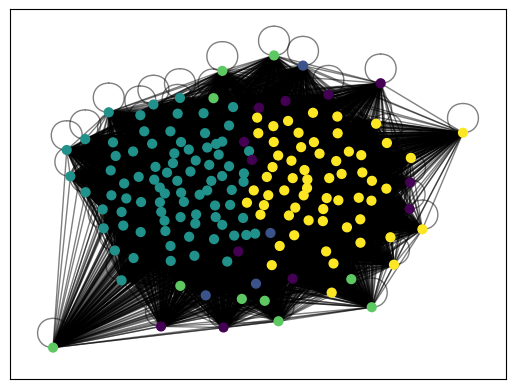

2012-10-31
The new day is assigned to cluster 1 with similarity 0.008893607592077512
2012-11-01
The new day is assigned to cluster 4 with similarity 0.003737221135871194
2012-11-02
The new day is assigned to cluster 4 with similarity 0.002297426528284045
2012-11-05
The new day is assigned to cluster 0 with similarity 0.007875646026350514
2012-11-06
The new day is assigned to cluster 1 with similarity 0.010419672005834997
2012-11-07
The new day is assigned to cluster 0 with similarity 0.0066027682978944775
2012-11-08
The new day is assigned to cluster 1 with similarity 0.009152209379851608
2012-11-09
The new day is assigned to cluster 0 with similarity 0.004744453181691487
2012-11-12
The new day is assigned to cluster 1 with similarity 0.004600547540914101
2012-11-13
The new day is assigned to cluster 3 with similarity 0.006086358294804796
2012-11-14
The new day is assigned to cluster 3 with similarity 0.006293392579555561
2012-11-15
The new day is assigned to cluster 3 with similarity 

In [113]:
#load clusters data use day as index
#clusters = pd.read_csv('data/clusters.csv', index_col=0)
#clusters.index = pd.to_datetime(clusters.index)

#new clusters 
clusters, min_window = classify_test_data(period_data)



In [114]:
# set day as index
clusters.set_index('Day', inplace=True)
clusters.index = pd.to_datetime(clusters.index)
clusters


,Cluster
Day,
2012-03-01,3
2012-03-02,2
2012-03-05,2
2012-03-06,2
2012-03-07,2
...,...
2012-12-21,2
2012-12-26,1
2012-12-27,3


In [115]:
 # drop lines in trades in for which we don't have clusters
log_ret = log_ret[log_ret.index.isin(clusters.index)]

In [116]:
from strategy import * 

def rolling_backtest(df_states, df_trades, min_window_size=30, quantile=0.25):
    """
    Performs a rolling window backtest of the investment strategy.

    Parameters:
    - strategy_func: Function to apply the investment strategy
    - df_states: DataFrame with market states for each day
    - df_trades: DataFrame with log returns for each stock per day
    - window_size: Number of past days to consider in the rolling window
    - strat: The investment strategy to use (e.g., 'tan', 'w_ret', etc.)
    - quantile: Percentage of top and bottom stocks to long and short (default 10%)

    Returns:
    - results_df: DataFrame containing portfolio returns for each day in the test period
    """
    results =  pd.DataFrame(index=df_states.index[min_window_size:])
    strats = ['tan', 'w_ret', 'top_bottom', 'momentum', 'risk_parity']

    for strat in strats:
        for i in tqdm(range(min_window_size, len(df_states))):
            
            # Select rolling window for states and trades
            rolling_states = df_states.iloc[: i + 1]
            rolling_return = df_trades.iloc[: i + 1]

            # Call the investment strategy function
            weights = investment_strategy(strat, rolling_states, rolling_return, quantile)

            # Compute portfolio return using today's actual returns (excluding the last day)
            portfolio_return = compute_portfolio_return(weights, rolling_return.iloc[-1])

            # Add a column to the results DataFrame with name strat + '_return'
            results.loc[df_states.index[i], 'c_' + strat + '_return'] = portfolio_return

            # Redo without clusters
            weights = investment_strategy(strat, rolling_states, rolling_return, quantile, use_cluster=False)

            # Compute portfolio return using today's actual returns (excluding the last day)
            portfolio_return = compute_portfolio_return(weights, rolling_return.iloc[-1])

            results.loc[df_states.index[i], strat + '_return'] = portfolio_return


        # Convert results to a DataFrame
        results_df = pd.DataFrame(results)
        

    return results_df


In [117]:
results = rolling_backtest(clusters, log_ret)

  0%|          | 0/178 [00:00<?, ?it/s]

100%|██████████| 178/178 [00:01<00:00, 166.62it/s]


In [112]:
results

,c_tan_return,tan_return,c_w_ret_return,w_ret_return,c_top_bottom_return,top_bottom_return,c_momentum_return,momentum_return,c_risk_parity_return,risk_parity_return
Day,,,,,,,,,,
2012-04-13,0.002375,0.001372,0.026813,0.033175,0.002393,0.001911,-0.008203,-0.006654,-0.002326,-0.002489
2012-04-16,-0.001439,0.002558,0.024885,0.028720,0.003111,0.004063,-0.004407,-0.002894,-0.000567,-0.000619
2012-04-17,0.000394,-0.000447,0.006355,0.007246,0.000024,-0.000017,-0.001254,-0.001103,-0.000760,-0.000785
2012-04-18,-0.001082,0.000104,0.034462,0.013238,0.004976,0.003392,-0.004959,-0.003897,-0.000895,-0.001015
2012-04-19,-0.001554,-0.001123,0.012297,0.005785,0.001240,0.001251,0.001948,0.001310,0.000758,0.001317
...,...,...,...,...,...,...,...,...,...,...
2012-12-21,-0.001005,-0.004257,0.000252,-0.022270,-0.000866,-0.001765,0.000906,-0.001337,0.000013,0.000068
2012-12-26,-0.000501,-0.016070,0.042493,-0.015576,0.003591,-0.002398,0.005465,-0.001507,-0.000710,-0.000798
2012-12-27,-0.000122,-0.029981,0.008823,0.014054,0.001668,0.001961,0.001249,0.001846,0.000488,0.000493


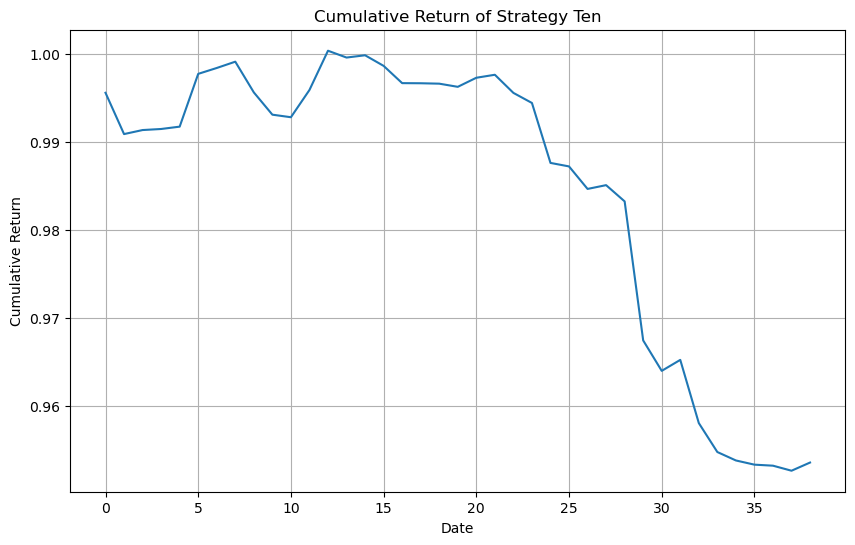

In [77]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(results_ten['cumulative_return'])
plt.title('Cumulative Return of Strategy Ten')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()


In [78]:
results_w_ret = rolling_backtest(clusters, log_ret, min_window_size=30, strat="w_ret", quantile=0.1)

  0%|          | 0/178 [00:00<?, ?it/s]

100%|██████████| 178/178 [00:00<00:00, 413.07it/s]


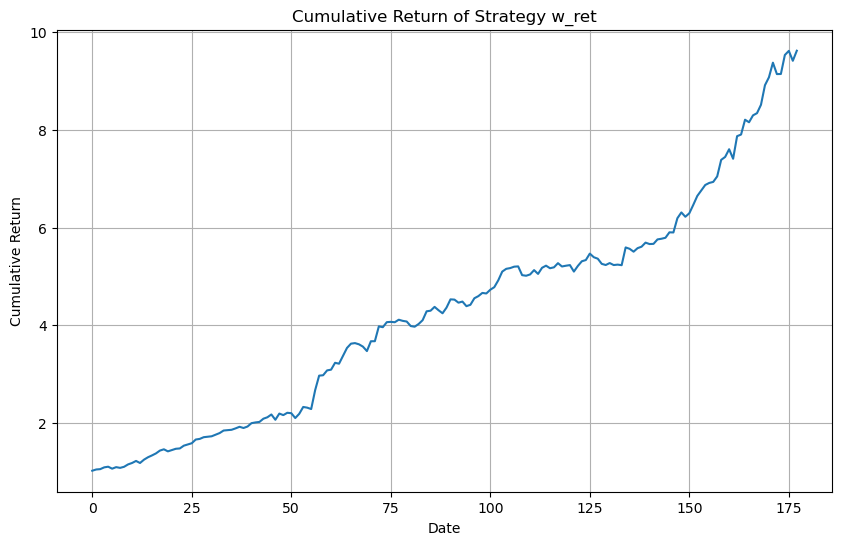

In [79]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(results_w_ret['cumulative_return'])
plt.title('Cumulative Return of Strategy w_ret')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [80]:
returns_top_bottom = rolling_backtest(clusters, log_ret, min_window_size=30, strat="top_bottom", quantile=0.25)

100%|██████████| 178/178 [00:00<00:00, 333.69it/s]


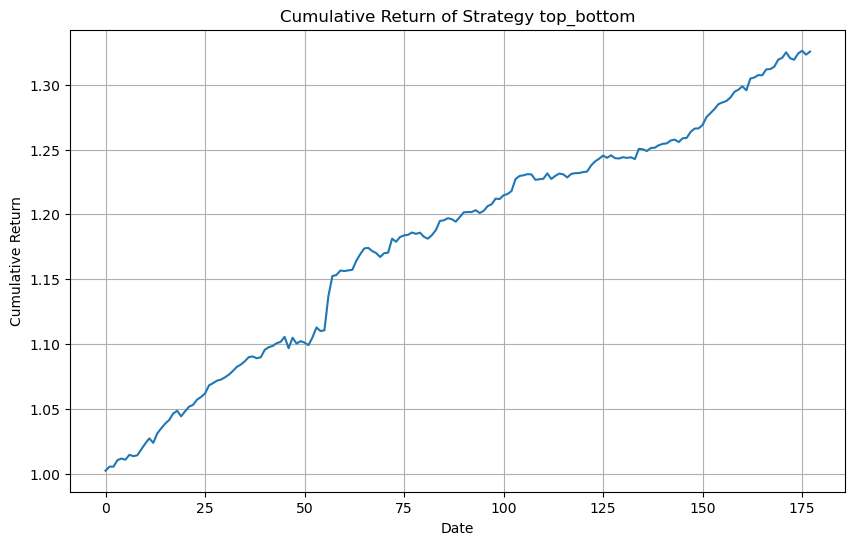

In [81]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(returns_top_bottom['cumulative_return'])
plt.title('Cumulative Return of Strategy top_bottom')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [82]:
returns_momentum = rolling_backtest(clusters, log_ret, min_window_size=30, strat="momentum", quantile=0.1)

  0%|          | 0/178 [00:00<?, ?it/s]

 52%|█████▏    | 93/178 [00:00<00:00, 459.12it/s]

-1.3934096436363133
-1.2578218464160698
-1.2084558326824961
-1.1187352930949372
-136.01408410459211
-1.211226912560969
-1.3390132831199946
-1.4798090498653278
-1.662333897776352
1795.398271980446
2.852615475528267
-2.022755325763224
-1.5360239116527403
-1.492394977167108
-2.0469322506701557
-1.4907186114540336
-3.0163183808935026
-1.471246256007926
-1.5649124452197258
-1.3441535645074771
-1.241463937957387
-1.1502346016175982
1.4786790751790009
-1.4904450590918967
-1.3757424353700045
-1.0888108517236201
1.0828532843168026
1.1948465975995741
-1.408716643568609
-1.4313211781239064
1.0552184383820975
-1.6723553223080907
-1.4989258268548074
1.890775614296127
-1.395292224705498
7.759108693765737
1.6589204872359569
-1.9564832682197717
-1.5526470858714243
-1.6162017516727984
-2.9462277311634835
-1.9652249790624623
-4.315139858378543
2.523522259487257
1.8688256586928416
-1.1673230705866238
-2.4480473132935177
5.697140345071204
-1.988638780676947
1.5586192920792654
-1.841718168011722
1.34376913

100%|██████████| 178/178 [00:00<00:00, 441.39it/s]

1.2539123831625867
1.381572086212869
1.2943029425493133
1.34712867343302
1.3508296134416373
1.3155321623650142
1.1902477222806862
1.1935267337252853
1.1602725529979012
5.287906576046829
1.1568585585527933
3.9052224146969974
1.1236532580062406
-4.286724037394173
1.1503996706027309
7.531967173601435
7.782503541228803
-50.71857619873311
1.2283823617499756
-19.11248577980474
18.036192986109082
13.148669964957312
5.312432871642349
1.2014383680124505
1.1978347515655399
4.2997368406227885
5.98348111306534
10.153570863807081
25.645005555637592
-11.516678463637046
1.24949567982454
-2.5676651110091613
1.2276673585623916
62.110541109588986
1.2393807644441026
12.712223774245418
1.3096925657164207
1.1704326156393625
-13.485019176134541
1.194019889925399
60.66031659425751
-1.086628776026239
1.3393274155676682
1.1643097969831209
1.2269006007363628
3.7371992295155634
1.2598317023008008
-2.577396314159454
4.050272611853793
-1.7138283884781673
2.2039273763493714
-1.1428764815882895
-1.0827995232732537
-

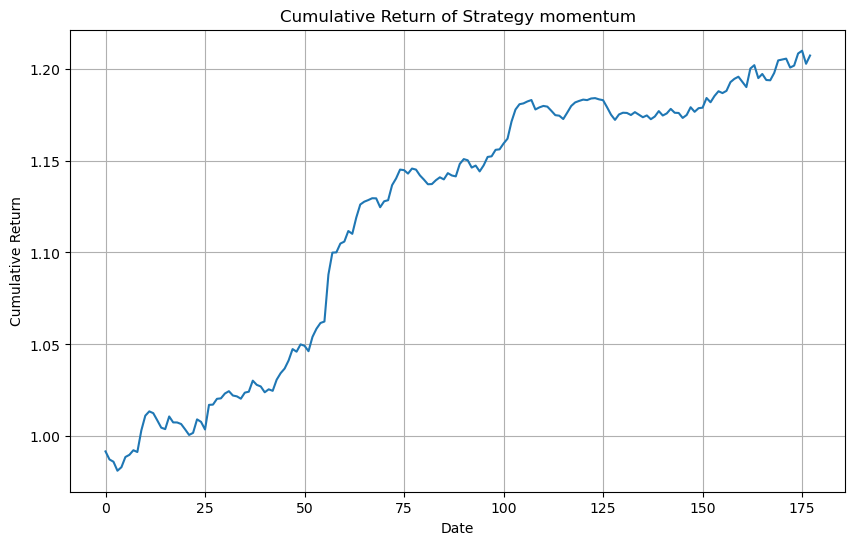

In [83]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(returns_momentum['cumulative_return'])
plt.title('Cumulative Return of Strategy momentum')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

In [84]:
returns_risk_parity = rolling_backtest(clusters, log_ret, min_window_size=30, strat="risk_parity", quantile=0.1)

  0%|          | 0/178 [00:00<?, ?it/s]

100%|██████████| 178/178 [00:00<00:00, 427.15it/s]


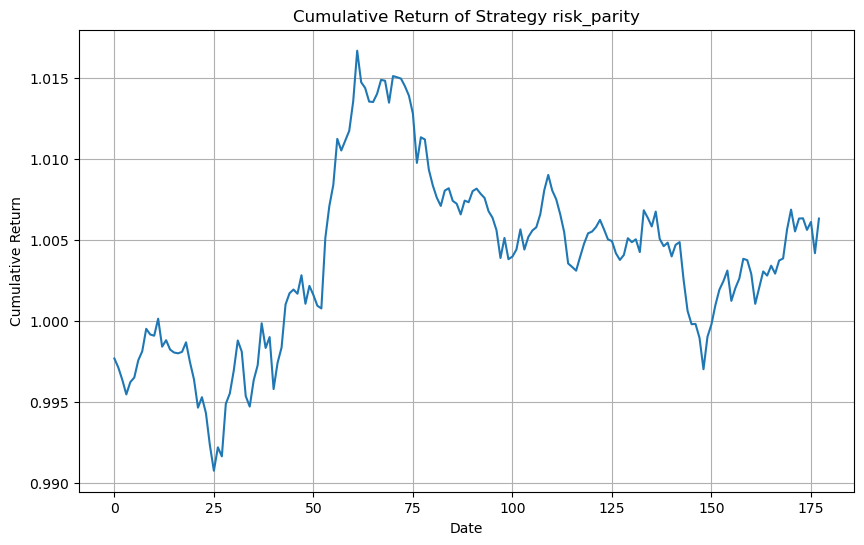

In [85]:
# plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(returns_risk_parity['cumulative_return'])
plt.title('Cumulative Return of Strategy risk_parity')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.show()

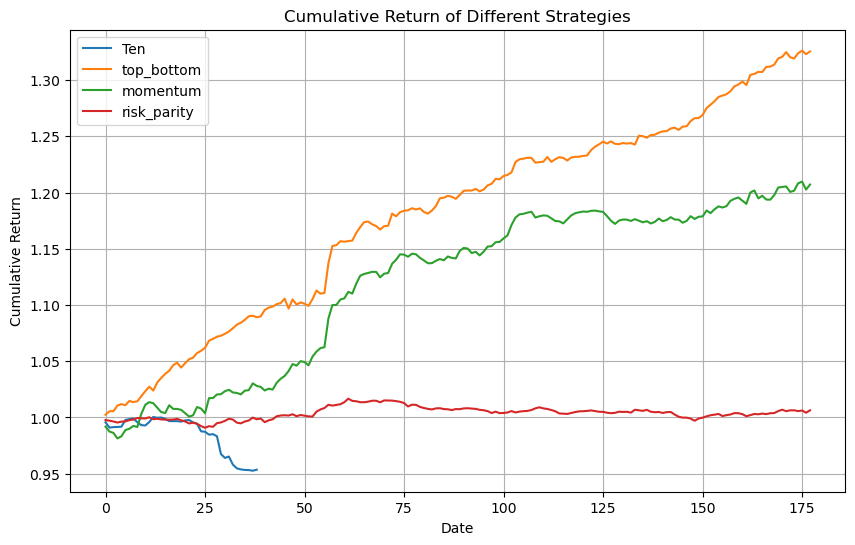

In [86]:
# plot all in one graph with legends
plt.figure(figsize=(10, 6))
plt.plot(results_ten['cumulative_return'], label='Ten')
#plt.plot(results_w_ret['cumulative_return'], label='w_ret')
plt.plot(returns_top_bottom['cumulative_return'], label='top_bottom')
plt.plot(returns_momentum['cumulative_return'], label='momentum')
plt.plot(returns_risk_parity['cumulative_return'], label='risk_parity')
plt.title('Cumulative Return of Different Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()